In [ ]:
import pandas as pd
import numpy as np

df_sla = pd.read_csv('sla_12_07_2023.csv', sep=',', converters=dict(IEF=np.float64, Matrícula=str, Latitude=np.float64, Longitude=np.float64)) \
    .iloc[:, [0,1,2,3,4, 9, 10, 11]]
df_enderecos = pd.read_csv('enderecos1.csv', sep=',', converters=dict(Matrícula=str)).iloc[:, [1,2,3,4,5,6,7,8,11,14,15,23,24,25,26,27,29,30]]
df_sla.IEF = df_sla.IEF.apply(lambda x: round(x * 100, 2))
display(df_sla.head())
display(df_enderecos.head())

#### Tratamento de dados

True
[(0, 'Unidade de Negócio - Código'), (1, 'Unidade de Negócio - Abreviação'), (2, 'Unidade de Negócio - Nome'), (3, 'Cidade - Código'), (4, 'Cidade - Nome'), (5, 'Grupo - Código'), (6, 'Grupo - Gerencia'), (7, 'Grupo - Nome'), (8, 'Matrícula'), (9, 'Endereço'), (10, 'Nro Medidor Antigo'), (11, 'Seguimento'), (12, 'Status'), (13, 'Latitude'), (14, 'Longitude'), (15, 'Leitura Medidor Antigo'), (16, 'Nome do cliente'), (17, 'Andar')]


<AxesSubplot: ylabel='IEF'>

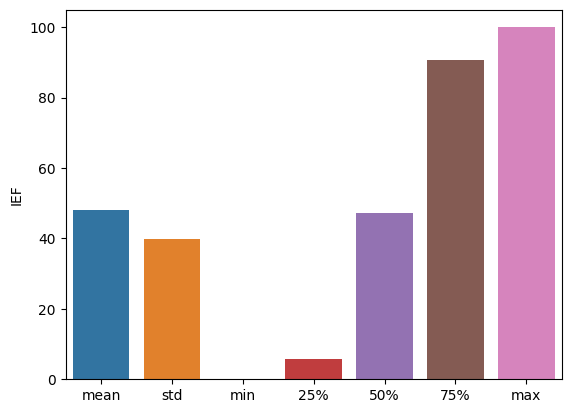

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Matrícula' in df_enderecos.columns)
print([(idx, element) for idx,element in enumerate(df_enderecos.columns)])
descs = df_sla[['IEF']].describe().drop('count').round(2)
sns.barplot(descs, x=descs.index, y='IEF')


In [4]:
concatenado = pd.merge(df_sla, df_enderecos, how='left', on='Matrícula', suffixes=['', '_y'])
display(concatenado)

,Modulo,Id/DevAddr,Pac/DevEUI,Nro Série,IEF,Matrícula,Latitude,Longitude,Unidade de Negócio - Código,Unidade de Negócio - Abreviação,...,Grupo - Nome,Endereço,Nro Medidor Antigo,Seguimento,Status,Latitude_y,Longitude_y,Leitura Medidor Antigo,Nome do cliente,Andar
0,3769060318,e0a74bde,0080e115005394a9,S22C004580EA,78.73,0001106306,-23.516505,-46.786595,3002,CMG,...,AV JOSE BARBOSA DE SIQUEIRA 1301,"R PAULA RODRIGUES 175, JARDIM PIRATININGA",C09E0009947D,BL 04,ATIVO,-23.516505,-46.786595,187977.0,BL 04 - 117,NaN
1,473320656,1c364cd0,0080E1150044D87B,S22C006867II,57.59,4000114515,-23.547179,-46.809460,3002,CMG,...,AV JOSE BARBOSA DE SIQUEIRA 1301,"AV JOSE BARBOSA DE SIQUEIRA 1301, PADROEIRA",C15I0001287D,BL 01,ATIVO,-23.547179,-46.809460,25448.0,BL 01 - 61,NaN
2,1402162625,53934dc1,0080E11500546F64,S22C004835II,89.24,4000995592,-23.547179,-46.809460,3002,CMG,...,AV JOSE BARBOSA DE SIQUEIRA 1301,"AV JOSE BARBOSA DE SIQUEIRA 1301, JARDIM PADRO...",C16I0012387D,BL 02,ATIVO,-23.547179,-46.809460,11093.0,BL 02 - 18,NaN
3,1005143085,3be9442d,0080E11500546BD5,S22C004820II,84.41,4000995657,-23.547179,-46.809460,3002,CMG,...,AV JOSE BARBOSA DE SIQUEIRA 1301,"AV JOSE BARBOSA DE SIQUEIRA 1301, JARDIM PADRO...",C16I0012386D,BL 02,ATIVO,-23.547179,-46.809460,0.0,BL 02 - 101,NaN
4,104023148,0633446c,0080E1150044E43F,S22C004797II,72.80,4000995601,-23.547179,-46.809460,3002,CMG,...,AV JOSE BARBOSA DE SIQUEIRA 1301,"AV JOSE BARBOSA DE SIQUEIRA 1301, JARDIM PADRO...",C16I0012388D,BL 02,ATIVO,-23.547179,-46.809460,0.0,BL 02 - 31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28087,1314079071,4e53415f,0080e1150555d061,S23C044194DA,82.61,0000690486,-23.583817,-46.543831,3002,CMG,...,SAO PAULO,"TV PACHECO LIMA, 17",C20D0086448D,CASA 1,ATIVO,-23.583817,-46.543831,0.0,CASA 1 - 0,NaN
28088,1711296295,66004f27,0080e115057c442e,S23C044688DA,100.00,4000377347,-23.521700,-46.473925,3002,CMG,...,SAO PAULO,"TV VITORIA SILVA SANTOS, 13",C11D0049690D,0,ATIVO,-23.521700,-46.473925,0.0,0 - 0,NaN
28089,1835091626,6d6146aa,0080e11505833e05,S23C043045DA,100.00,4002184395,-23.539501,-46.503459,3002,CMG,...,SAO PAULO,"VLA WALDIR CALMON, 18",C22D0093827D,CASA 2,ATIVO,-23.539501,-46.503459,0.0,CASA 2 - 0,NaN
28090,3010479936,b3704740,0080e115057c6b88,S23C044493DA,82.46,4002179826,-23.539494,-46.503448,3002,CMG,...,SAO PAULO,"VLA WALDIR CALMON, 18",C22D0093833D,CASA,ATIVO,-23.539494,-46.503448,0.0,CASA - 0,NaN


In [5]:
print(concatenado.columns)
concatenado.drop(columns=['Latitude_y', 'Longitude_y'], inplace=True)

Index(['Modulo', 'Id/DevAddr', 'Pac/DevEUI', 'Nro Série', 'IEF', 'Matrícula',
       'Latitude', 'Longitude', 'Unidade de Negócio - Código',
       'Unidade de Negócio - Abreviação', 'Unidade de Negócio - Nome',
       'Cidade - Código', 'Cidade - Nome', 'Grupo - Código',
       'Grupo - Gerencia', 'Grupo - Nome', 'Endereço', 'Nro Medidor Antigo',
       'Seguimento', 'Status', 'Latitude_y', 'Longitude_y',
       'Leitura Medidor Antigo', 'Nome do cliente', 'Andar'],
      dtype='object')


In [6]:
concatenado.to_excel('sla_com_endereco_instcomgas.xlsx', sheet_name='base_de_dados', na_rep='-', freeze_panes=(1,1), index=False)